In [7]:
API_KEY=""

In [8]:
import os
from datetime import datetime
from PIL import Image
import requests
from io import BytesIO
from mercator_projection import *

In [27]:
IMG_SIZE = 400

In [9]:
# places
# img1 41.859236, -87.875044 (chicago)
# img2 47.377985, 8.548461 (Zurich)
# img3 47.381860, 8.545357 (ETH Zurich)
# img4 41.859237, -87.867530 (chicago)
# 41.951539, -87.776590 (chicago similar)
# 41.767707, -88.017959 (chicago outside center, more parking)

In [47]:
payload_img = {
    'key': API_KEY,
    'size': '440x440',
    'center': '41.859237, -87.867530',
    'zoom': 18,
    'maptype': 'satellite',
}

In [48]:
payload_gt = {
    'key': API_KEY,
    'size': '440x440',
    'center': '41.859237, -87.867530',
    'zoom': 18,
    'maptype': 'roadmap',
    'style': [
        'color:0x000000',
        'element:labels|visibility:off',
        'feature:administrative|element:geometry|visibility:off',
        'feature:administrative.land_parcel|visibility:off',
        'feature:administrative.neighborhood|visibility:off',
        'feature:poi|visibility:off',
        'feature:road|element:labels.icon|visibility:off',
        'feature:transit|visibility:off',
        'feature:road|element:geometry.stroke|color:0xffffff',
        'feature:road|element:geometry.fill|color:0xffffff',
    ],
}

In [49]:
r = requests.get('https://maps.googleapis.com/maps/api/staticmap', params=payload_img)

In [50]:
img = Image.open(BytesIO(r.content))

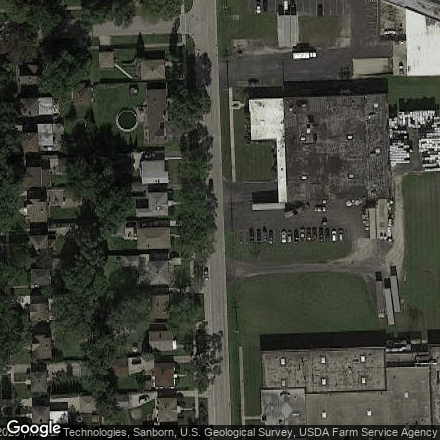

In [51]:
img

In [52]:
img2 = img.crop((20, 20, 420, 420))

In [53]:
img2.show()

In [54]:
# img.save("/Users/msladek/Documents/eth/cil/CIL-street/code/scraping/scraped_gt/img4.png")
img2.save("/Users/msladek/Documents/eth/cil/CIL-street/code/scraping/tst22222.png")

In [94]:
# 41.859236, -87.875044 (chicago) (center of tst3) (10x10) or ETH Zurich (mistake)
# 41.951539, -87.776590 (chicago more similar) (center of tst4) (10x10)

In [59]:
# img3 47.381860, 8.545357 (ETH Zurich)
# 41.951539, -87.776590
centerLat = 41.951539
centerLon = -87.776590
zoom = 18
mapWidth = 400
mapHeight = 400
centerPoint = G_LatLng(centerLat, centerLon)
corners = getCorners(centerPoint, zoom, mapWidth, mapHeight)
print(corners)

{'N': 41.95233690982279, 'E': -87.77551711639403, 'S': 41.950741080188976, 'W': -87.77766288360594}


In [60]:
47.38113353586419, 8.546429883605944

(47.38113353586419, 8.546429883605944)

In [64]:
def next_center(lat, lon):
    centerPoint = G_LatLng(lat, lon)
    corners = getCenters(centerPoint, zoom, mapWidth, mapHeight)
    return corners

In [65]:
def down(lat, lon, idx, dirname):
    print(lat, lon)
    directory = "/Users/msladek/Documents/eth/cil/CIL-street/code/scraping/data/{}".format(dirname)
    directory_img = directory + "_img"
    directory_gt = directory + "_gt"
    os.makedirs(directory_img, exist_ok=True)
    os.makedirs(directory_gt, exist_ok=True)
    payload_img = {
        'key': API_KEY,
        'size': '440x440',
        'center': '0, 0',
        'zoom': 18,
        'maptype': 'satellite',
    }
    payload_img['center'] = "{}, {}".format(lat, lon)
    payload_gt = {
        'key': API_KEY,
        'size': '440x440',
        'center': '0, 0',
        'zoom': 18,
        'maptype': 'roadmap',
        'style': [
            'color:0x000000',
            'element:labels|visibility:off',
            'feature:administrative|element:geometry|visibility:off',
            'feature:administrative.land_parcel|visibility:off',
            'feature:administrative.neighborhood|visibility:off',
            'feature:poi|visibility:off',
            'feature:road|element:labels.icon|visibility:off',
            'feature:transit|visibility:off',
            'feature:road|element:geometry.stroke|color:0xffffff',
            'feature:road|element:geometry.fill|color:0xffffff',
        ],
    }
    payload_gt['center'] = "{}, {}".format(lat, lon)
    send_req(payload_img, idx, directory_img)
    send_req(payload_gt, idx, directory_gt)

In [66]:
def send_req(payload, idx, dr):
    r = requests.get('https://maps.googleapis.com/maps/api/staticmap', params=payload)
    img = Image.open(BytesIO(r.content))
    img2 = img.crop((20, 20, 420, 420))
    path = "{}/img_{}.png".format(dr, idx)
    img2.save(path)

In [67]:
# break
# 41.951539, -87.776590
start_lat = 41.951539
start_lon = -87.776590
dirname = "tst6"
curr_lat = start_lat
curr_lon = start_lon
idx = 220
for i in range(2):
    for j in range(2):
        down(curr_lat, curr_lon, idx, dirname)
        curr_lon = next_center(curr_lat, curr_lon)['ECenter'][1]
        idx = idx + 1
    curr_lon = start_lon
    curr_lat = next_center(curr_lat, curr_lon)['SCenter'][0]

41.951539 -87.77659
41.951539 -87.77444423278807
41.94994315038974 -87.77659
41.94994315038974 -87.77444423278807


In [121]:
# https://gis.stackexchange.com/questions/7430/what-ratio-scales-do-google-maps-zoom-levels-correspond-to
import math
# metersPerPx = 156543.03392 * Math.cos(latLng.lat() * Math.PI / 180) / Math.pow(2, zoom)
metersPerPx = 156543.03392 * math.cos(41.859237 * math.pi / 180) / (2**16)
cmPerPx = metersPerPx * 100
print(metersPerPx, cmPerPx)
print("size of border:", metersPerPx*400)

1.7790395537289458 177.9039553728946
size of border: 711.6158214915783
